#  TensorFlow's Decision Forests (TF-DF) algorithm

Author: __Thirada Tiamklang 14337188__

        AT3 - Data Product with Machine 
In this experiment, we will train the model with TensorFlow's Decision Forests (TF-DF), including Random Forest and Gradient Boosted Trees, to predict the total fares.


__Table of contents__
1. [Load dataset](#load-dataset)
2. [Train TensorFlow's Decision Forests (TF-DF) algorithm:]()

                2.1 Random forest model
                2.2 Gradient Boosted Trees
3. [Conclusion]()
4. [Reference]()

## 1. Load Dataset

In [32]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [33]:
import sys
print(sys.path)

['/Users/thiradatiamklang/Desktop/flight-streamlit-at3/flight-prediction/notebooks/TT_notebooks', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages', '../../src']


In [34]:
import sys
sys.path.append('../../src')


In [35]:
from data.make_dataset import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

In [36]:
import pandas as pd
# Read a Feather file
df = pd.read_feather('../../data/processed/df_cleaned_select_cols.feather')

In [37]:
from data.make_dataset import pop_target
features, target = pop_target(df, 'totalFare')

In [38]:
y_train

array([-0.31391783, -0.50182474, -1.22936172, ..., -0.89209292,
        1.17970114, -0.04892092])

In [41]:
X_train.shape

(8111999, 12)

## 2. Train TensorFlow's Decision Forests (TF-DF)

In [42]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Convert data to tf.data.Datasets
batch_size = 100

# Assuming X_train, y_train, X_val, y_val, X_test, and y_test are NumPy arrays or tensors
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(batch_size)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation_dataset = validation_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)


### [2.1] Train Random Forest models

In [43]:
# Define the TensorFlow Decision Forest model
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

# Compile the model
model.compile(metrics=["mean_squared_error"])

# Fit the model
model.fit(train_dataset, epochs=1, validation_data=validation_dataset)

Use /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpz8o_vba6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:08.272736. Found 8111999 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(2704000, shape=(), dtype=int32)
Validation dataset read in 0:00:02.908717. Found 2704000 examples.
Training model...


[INFO 23-11-07 12:59:49.3133 AEDT kernel.cc:1233] Loading model from path /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpz8o_vba6/model/ with prefix 435059869ffc46f5
[INFO 23-11-07 12:59:57.9898 AEDT decision_forest.cc:660] Model loaded with 300 root(s), 7246380 node(s), and 8 input feature(s).
[INFO 23-11-07 12:59:57.9900 AEDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 23-11-07 12:59:57.9900 AEDT kernel.cc:1061] Use fast generic engine


Model trained in 0:22:39.529805
Compiling model...
Model compiled.


In [44]:
# Evaluate the model on train set
results = model.evaluate(train_dataset)

81120/81120 [==============================] - 325s 4ms/step - loss: 0.0000e+00 - mean_squared_error: 0.3077


In [45]:
# Evaluate the model on test set
results = model.evaluate(test_dataset)

# Make predictions
predictions = model.predict(test_dataset)

27040/27040 [==============================] - 108s 4ms/step


__Note:__ It can be seen that the MSE score for the train and test sets is nearly the same with low overfitting, and the MSE score is approximately `0.3098`.

In [46]:
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
# Print RMSE
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5565925761330635


#### __Model Architecture__

We will try different model architectures to see if they improve the MSE score.

In [47]:
# Define custom model architecture and hyperparameters
model_rf1 = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    num_trees=100,
    max_depth=10,     
)

# Compile the model
model_rf1.compile(metrics=["mean_squared_error"])

# Train the model
model_rf1.fit(train_dataset, epochs=1, validation_data=validation_dataset)

Use /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpjrknm5e5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:08.196395. Found 8111999 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(2704000, shape=(), dtype=int32)
Validation dataset read in 0:00:02.734774. Found 2704000 examples.
Training model...
Model trained in 0:02:46.330383
Compiling model...


[INFO 23-11-07 13:30:34.6786 AEDT kernel.cc:1233] Loading model from path /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpjrknm5e5/model/ with prefix f8d44b47c67a4d27
[INFO 23-11-07 13:30:34.7878 AEDT decision_forest.cc:660] Model loaded with 100 root(s), 97122 node(s), and 8 input feature(s).
[INFO 23-11-07 13:30:34.7878 AEDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 23-11-07 13:30:34.7879 AEDT kernel.cc:1061] Use fast generic engine


Model compiled.


In [48]:
# Evaluate the model on train set
results1 = model_rf1.evaluate(train_dataset)

81120/81120 [==============================] - 55s 680us/step - loss: 0.0000e+00 - mean_squared_error: 0.4261


In [49]:
# Evaluate the model on test set
results1 = model_rf1.evaluate(test_dataset)

27040/27040 [==============================] - 19s 692us/step - loss: 0.0000e+00 - mean_squared_error: 0.4254


__Note:__ It can be seen that the MSE score with the custom model architecture provides a worse score than the model with default architecture. 

### [2.2] Gradient Boosted Trees

In [50]:
# Define and train the Gradient Boosted Trees models
model_gbdt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
model_gbdt.compile(metrics=["mean_squared_error"])
# fit model
model_gbdt.fit(train_dataset)

Use /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpraxyfcm6 as temporary training directory
Reading training dataset...


[WARNING 23-11-07 13:33:51.6759 AEDT gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-07 13:33:51.6778 AEDT gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-07 13:33:51.6778 AEDT gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:08.047989. Found 8111999 examples.
Training model...
Model trained in 0:10:01.319621
Compiling model...
Model compiled.


[INFO 23-11-07 13:44:01.0156 AEDT kernel.cc:1233] Loading model from path /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpraxyfcm6/model/ with prefix ccb819e28b484a1b
[INFO 23-11-07 13:44:01.0467 AEDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-11-07 13:44:01.0467 AEDT kernel.cc:1061] Use fast generic engine


In [51]:
# Evaluate the Gradient Boosted Trees models on training set
results_gbdt = model_gbdt.evaluate(train_dataset)

81120/81120 [==============================] - 42s 521us/step - loss: 0.0000e+00 - mean_squared_error: 0.3165


In [52]:
# Evaluate the Gradient Boosted Trees models on test set
results_gbdt = model_gbdt.evaluate(test_dataset)

27040/27040 [==============================] - 14s 512us/step - loss: 0.0000e+00 - mean_squared_error: 0.3160


In [54]:
# Make predictions
predictions_gbdt = model_gbdt.predict(test_dataset)

27040/27040 [==============================] - 14s 526us/step


In [55]:
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions_gbdt))
# Print RMSE
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5620956218424686


__Note:__ We will define the Random Forest model as the best model, as it achieved a slightly better Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) compared to the `Gradient Boosted Trees (GBT) model`. We will use this `Random Forest model` to make predictions on new data in Streamlit.

## 3. Conclusion

### [3.1] save the best model

Since the lowest MSE and RMSE are `0.3098` and `0.5565925761330635` respectively, we will save the model, the default Random Forest model, in the 'models' folder.

In [56]:
model.save('../../models/tfdf_model')

INFO:tensorflow:Assets written to: ../../models/tfdf_model/assets


INFO:tensorflow:Assets written to: ../../models/tfdf_model/assets


In [60]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("../../models/tfdf_model")

[INFO 23-11-07 13:54:22.5316 AEDT kernel.cc:1233] Loading model from path ../../models/tfdf_model/assets/ with prefix 435059869ffc46f5
[INFO 23-11-07 13:54:34.8913 AEDT decision_forest.cc:660] Model loaded with 300 root(s), 7246380 node(s), and 8 input feature(s).
[INFO 23-11-07 13:54:34.8916 AEDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 23-11-07 13:54:34.8917 AEDT kernel.cc:1061] Use fast generic engine


In [57]:
import joblib
# Save the object to the file
joblib.dump(model, '../../models/tfdf.joblib')

['../../models/tfdf.joblib']

In [58]:
# Load the TensorFlow Decision Forests model
tfdf_model = joblib.load('../../models/tfdf.joblib')

Use /var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/tmpeaglsxyq as temporary training directory


In [61]:
print(loaded_model.summary())

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
None


In [63]:
newpredict = loaded_model.predict(X_test)

84500/84500 [==============================] - 125s 1ms/step


In [64]:
import numpy as np
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, newpredict))
# Print RMSE
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.5565925761330635


__Example for predict__

In [69]:
# Create input data for prediction (similar to your previous code)
input_data = {
        'totalTravelDistance': [1569.618],
        'isNonStop': [0],
        'isBasicEconomy': [1],
        'startingAirport': [1],
        'destinationAirport': [3],
        'segmentsCabinCode': [28],
        'flightDate_day': [11],
        'flightDate_month': [11],
        'flightDate_year': [2023],
        'DepartTime_hour': [10],
        'DepartTime_minute': [30],
        'DepartTime_second': [0],
    }

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_data)

# Use the loaded models to make predictions
total_fare = loaded_model.predict(input_df)
   
print(f'The total fare for your trip with TensorFlow model: ${total_fare[0][0]:.2f}')

1/1 [==============================] - 0s 71ms/step
The total fare for your trip with TensorFlow model: $5.70


### [3.2] Feature Importance

In [29]:
# Get feature importances from trained TF-DF model
feature_importances = model.make_inspector().variable_importances()

In [35]:
for feature_name, importance_score in feature_importances.items():
    print(f'Feature: {feature_name}, Importance: {importance_score}')


Feature: NUM_NODES, Importance: [("data:0.0" (1; #1), 1561994.0), ("data:0.7" (1; #11), 1162277.0), ("data:0.1" (1; #2), 588198.0), ("data:0.5" (1; #9), 297454.0), ("data:0.8" (1; #12), 252870.0), ("data:0.4" (1; #8), 128530.0), ("data:0.6" (1; #10), 51748.0), ("data:0.2" (1; #6), 7441.0), ("data:0.3" (1; #7), 5040.0)]
Feature: INV_MEAN_MIN_DEPTH, Importance: [("data:0.1" (1; #2), 0.6153276550330179), ("data:0.6" (1; #10), 0.40275333967392335), ("data:0.3" (1; #7), 0.17464396086018844), ("data:0.8" (1; #12), 0.10579116166689573), ("data:0.0" (1; #1), 0.10132751630984621), ("data:0.5" (1; #9), 0.0957802845477692), ("data:0.7" (1; #11), 0.0940061788229036), ("data:0.2" (1; #6), 0.09389549800383454), ("data:0.4" (1; #8), 0.09114631087382391)]
Feature: SUM_SCORE, Importance: [("data:0.1" (1; #2), 815167578.0873041), ("data:0.6" (1; #10), 360927580.47942644), ("data:0.5" (1; #9), 98801333.71974559), ("data:0.3" (1; #7), 78518994.37775637), ("data:0.0" (1; #1), 68651896.25650981), ("data:0.4

### [3.3] Model Prediction Comparisons

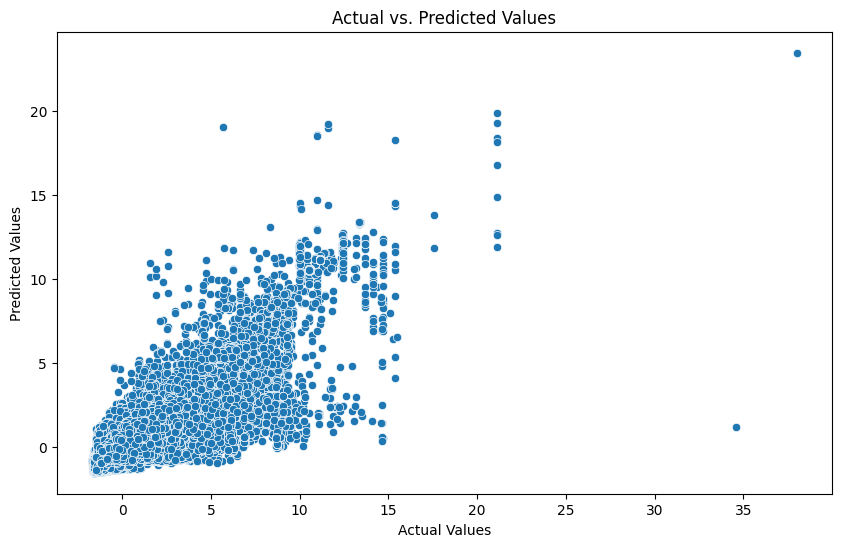

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have actual test labels (y_test) and predictions (predictions)
y_test = y_test.ravel()  # Ensure y_test is 1D
predictions = predictions.ravel()  # Ensure predictions are 1D

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, palette='pastel')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()



## Reference

Anthony So. (2023). _36120_AdvMLA_Lab6_Exercise1_Solutions.ipynb_. Google Colab. https://colab.research.google.com/drive/1BD81KJ1ixR1Z-cE1GYJ3RFydkJzy3ZWY?authuser=1#scrollTo=Goi9jTI_B1KE

TensorFlow Decision Forests. (2023). _TensorFlow Decision Forests API documentation_. TensorFlow. https://www.tensorflow.org/decision_forests/api_docs/python/tfdf